## Imports ##

In [1]:
from tqdm import tqdm
from mnist import MNIST
import numpy as np
import matplotlib.pyplot as plt
import torch
%matplotlib inline
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='large')
plt.rc('ytick', labelsize='large')

## Load MNIST ##

In [2]:
mndata = MNIST('data')
x_train_data, y_train_data = mndata.load_training()
x_test_data, y_test_data = mndata.load_testing()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("device:", device)

device: cuda


## Build Noisy MNIST Environment ##

In [3]:
from noisy_mnist_aleatoric_uncertainty_for_poster import NoisyMnistEnv
mnist_env_train = NoisyMnistEnv("train", 0, 2)
mnist_env_test_zeros = NoisyMnistEnv("test", 0, 1)
mnist_env_test_ones = NoisyMnistEnv("test", 1, 2)

device: cuda:1


## Define Experiments ##

In [4]:
repeats = 1
training_steps=5000
checkpoint_loss=10
mse_lr = 0.001 
aleatoric_lr = 0.0001

from noisy_mnist_aleatoric_uncertainty_for_poster import Net, NoisyMNISTExperimentRun, AleatoricNet, NoisyMNISTExperimentRunAMA
mse_model = Net()
experiment_mse = NoisyMNISTExperimentRun(
    repeats=repeats,
    training_steps=training_steps,
    checkpoint_loss=checkpoint_loss,
    lr=mse_lr,
    model=mse_model,
    mnist_env_train=mnist_env_train,
    mnist_env_test_zeros=mnist_env_test_zeros,
    mnist_env_test_ones=mnist_env_test_ones,
    device=device,
)
aleatoric_model = AleatoricNet()
experiment_AMA = NoisyMNISTExperimentRunAMA(
    repeats=repeats,
    training_steps=training_steps,
    checkpoint_loss=checkpoint_loss,
    lr=aleatoric_lr,
    model=aleatoric_model,
    mnist_env_train=mnist_env_train,
    mnist_env_test_zeros=mnist_env_test_zeros,
    mnist_env_test_ones=mnist_env_test_ones,
    device=device,
)

In [6]:
experiment_mse.run_experiment()

100%|██████████| 5000/5000 [00:48<00:00, 102.69it/s]


In [7]:
experiment_AMA.run_experiment()

100%|██████████| 5000/5000 [00:53<00:00, 93.02it/s]


## Qualitative Plots ##

<Figure size 16000x12000 with 0 Axes>

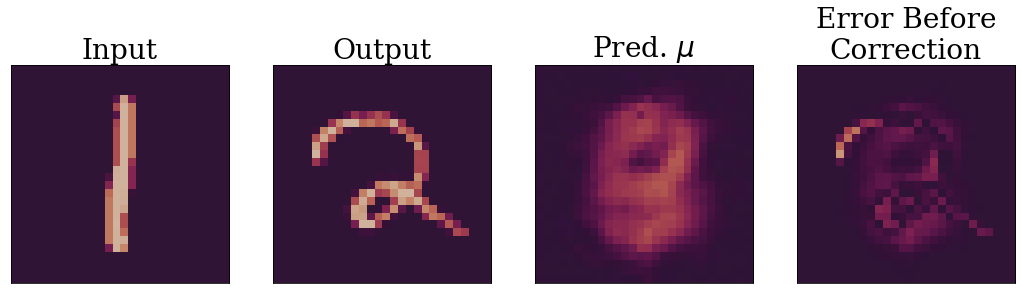

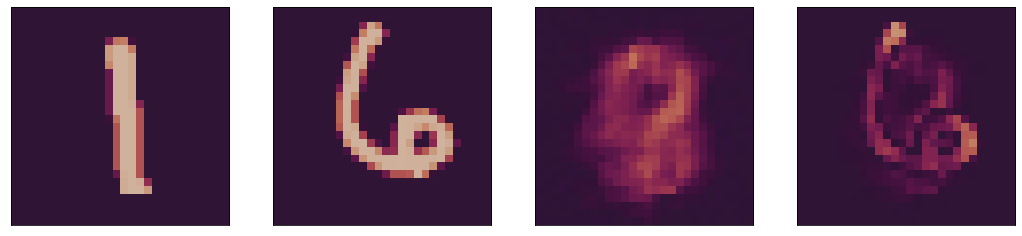

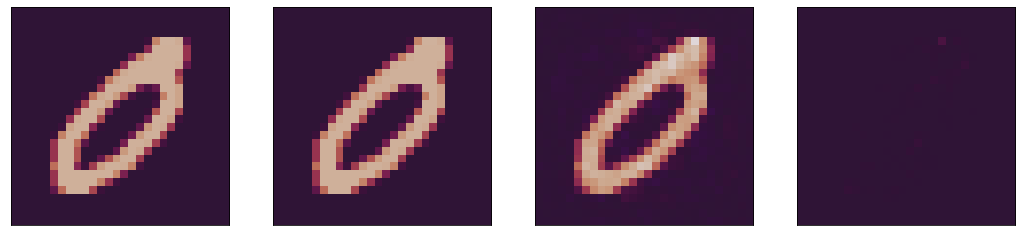

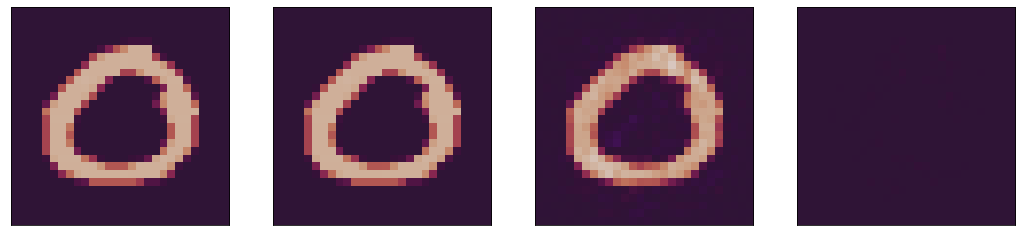

In [8]:
data, target = mnist_env_test_ones.step()
mu = mse_model(torch.from_numpy(data).float().to(device)/255)


from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=2000, facecolor='w', edgecolor='k')
title_size = 28
cmap='twilight'
lower_color, higher_color = -1.25, 1.25 

for i in range(2):
    
    w=10
    h=10
    fig=plt.figure(figsize=(18, 18))
    columns = 4
    rows = 1
    fig.add_subplot(rows, columns, 1)
    plt.imshow(data[i].reshape(28, 28)/255, vmin=-1, vmax=1, cmap=cmap)
    plt.clim(lower_color,higher_color) 
    plt.xticks([])
    plt.yticks([])
    if i == 0:
        plt.title(r"Input", fontsize=title_size)
    
    fig.add_subplot(rows, columns, 2)
    plt.imshow(target[i].reshape(28, 28)/255, vmin=-1, vmax=1, cmap=cmap)
    plt.clim(lower_color,higher_color) 
    plt.xticks([])
    plt.yticks([])
    if i == 0:
        plt.title(r"Output", fontsize=title_size)
    
    fig.add_subplot(rows, columns, 3)
    plt.imshow(mu[i].detach().cpu().numpy().reshape(28, 28), vmin=-1, vmax=1, cmap=cmap)
    plt.clim(lower_color,higher_color) 
    plt.xticks([])
    plt.yticks([])
    if i == 0:
        plt.title("Pred. $\mu$", fontsize=title_size)
    
    fig.add_subplot(rows, columns, 4)
    error = ((mu[i].detach().cpu().numpy() - target[i]/255)**2).reshape(28, 28)
    avg_error = np.mean(error)
    plt.imshow(error, vmin=-1, vmax=1, cmap=cmap)
    plt.clim(lower_color,higher_color) 
    plt.xticks([])
    plt.yticks([])
    if i == 0:
        plt.title("Error Before\nCorrection", fontsize=title_size)

    #print(((mu[i].detach().cpu().numpy() - target[i]/255)**2).reshape(28,28) - np.exp(sigma[i].detach().cpu().numpy()).reshape(28, 28))
    #if i == 0:~}
#     cbar= plt.colorbar()
#     for t in cbar.ax.get_yticklabels():
#         t.set_fontsize(30)
    #plt.show()
    
data, target = mnist_env_test_zeros.step()
mu = mse_model(torch.from_numpy(data).float().to(device)/255)

# from matplotlib.pyplot import figure
# figure(num=None, figsize=(8, 6), dpi=2000, facecolor='w', edgecolor='k')
# title_size = 12
# cmap='twilight'
# lower_color, higher_color = -1.25, 1.25 

for i in range(2):
    
    w=10
    h=10
    fig=plt.figure(figsize=(18, 18))
    columns = 4
    rows = 1
    fig.add_subplot(rows, columns, 1)
    plt.imshow(data[i].reshape(28, 28)/255, vmin=-1, vmax=1, cmap=cmap)
    plt.clim(lower_color,higher_color) 
    plt.xticks([])
    plt.yticks([])
#     if i == 0:
#         plt.title(r"Input", fontsize=title_size)
    
    fig.add_subplot(rows, columns, 2)
    plt.imshow(target[i].reshape(28, 28)/255, vmin=-1, vmax=1, cmap=cmap)
    plt.clim(lower_color,higher_color) 
    plt.xticks([])
    plt.yticks([])
#     if i == 0:
#         plt.title(r"Output", fontsize=title_size)
    
    fig.add_subplot(rows, columns, 3)
    plt.imshow(mu[i].detach().cpu().numpy().reshape(28, 28), vmin=-1, vmax=1, cmap=cmap)
    plt.clim(lower_color,higher_color) 
    plt.xticks([])
    plt.yticks([])
#     if i == 0:
#         plt.title("Pred. $\mu$", fontsize=title_size)
#         plt.title("Pred. $\sigma$", fontsize=title_size)
    
    fig.add_subplot(rows, columns, 4)
    error = ((mu[i].detach().cpu().numpy() - target[i]/255)**2).reshape(28, 28)
    avg_error = np.mean(error)
    plt.imshow(error, vmin=-1, vmax=1, cmap=cmap)
    plt.clim(lower_color,higher_color) 
    plt.xticks([])
    plt.yticks([])
#     if i == 0:
#         plt.title("MSE Error", fontsize=title_size)
#     if i == 0:
#         plt.title("AMA Error", fontsize=title_size)
    #print(((mu[i].detach().cpu().numpy() - target[i]/255)**2).reshape(28,28) - np.exp(sigma[i].detach().cpu().numpy()).reshape(28, 28))
    #if i == 0:~}
#     cbar= plt.colorbar()
#     for t in cbar.ax.get_yticklabels():
#         t.set_fontsize(30)
    plt.show()

<Figure size 16000x12000 with 0 Axes>

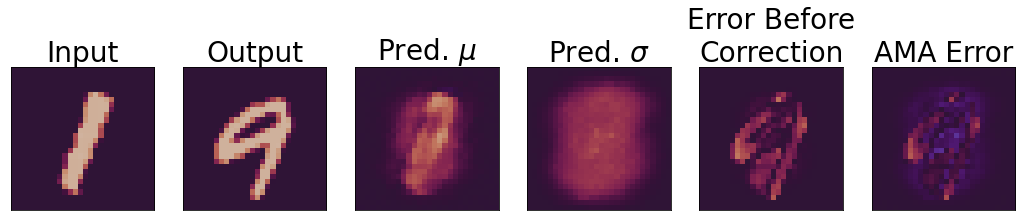

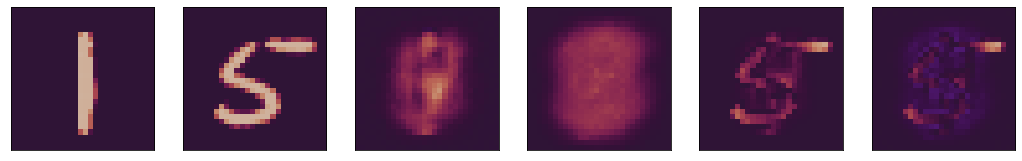

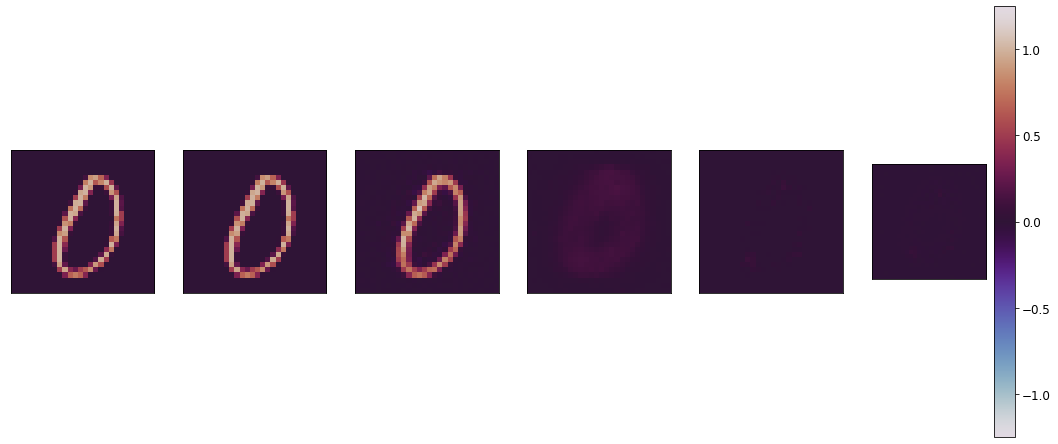

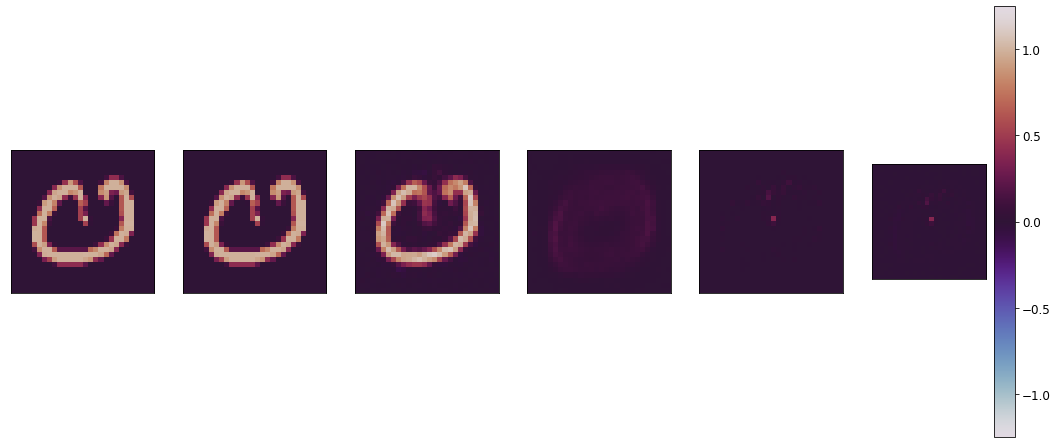

<Figure size 432x288 with 0 Axes>

In [9]:
data, target = mnist_env_test_ones.step()
mu, sigma = aleatoric_model(torch.from_numpy(data).float().to(device)/255)

plt.rc('font', family='sans-serif')
plt.rc('xtick', labelsize='large')
plt.rc('ytick', labelsize='large')
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=2000, facecolor='w', edgecolor='k')
title_size = 28
cmap='twilight'
lower_color, higher_color = -1.25, 1.25 

for i in range(2):
    
    w=10
    h=10
    fig=plt.figure(figsize=(18, 18))
    columns = 6
    rows = 1
    fig.add_subplot(rows, columns, 1)
    plt.imshow(data[i].reshape(28, 28)/255, vmin=-1, vmax=1, cmap=cmap)
    plt.clim(lower_color,higher_color) 
    plt.xticks([])
    plt.yticks([])
    if i == 0:
        plt.title(r"Input", fontsize=title_size)
    
    fig.add_subplot(rows, columns, 2)
    plt.imshow(target[i].reshape(28, 28)/255, vmin=-1, vmax=1, cmap=cmap)
    plt.clim(lower_color,higher_color) 
    plt.xticks([])
    plt.yticks([])
    if i == 0:
        plt.title(r"Output", fontsize=title_size)
    
    fig.add_subplot(rows, columns, 3)
    plt.imshow(mu[i].detach().cpu().numpy().reshape(28, 28), vmin=-1, vmax=1, cmap=cmap)
    plt.clim(lower_color,higher_color) 
    plt.xticks([])
    plt.yticks([])
    if i == 0:
        plt.title("Pred. $\mu$", fontsize=title_size)
    
    fig.add_subplot(rows, columns, 4)
    plt.imshow(np.sqrt(np.exp((sigma[i].detach().cpu().numpy().reshape(28, 28)))), vmin=-1, vmax=1, cmap=cmap)
    plt.clim(lower_color,higher_color) 
    plt.xticks([])
    plt.yticks([])
    if i == 0:
        plt.title("Pred. $\sigma$", fontsize=title_size)
    
    fig.add_subplot(rows, columns, 5)
    error = ((mu[i].detach().cpu().numpy() - target[i]/255)**2).reshape(28, 28)
    avg_error = np.mean(error)
    plt.imshow(error, vmin=-1, vmax=1, cmap=cmap)
    plt.clim(lower_color,higher_color) 
    plt.xticks([])
    plt.yticks([])
    if i == 0:
        plt.title("Error Before\nCorrection", fontsize=title_size)

    fig.add_subplot(rows, columns, 6)
    error = ((mu[i].detach().cpu().numpy() - target[i]/255)**2).reshape(28,28) - np.exp(sigma[i].detach().cpu().numpy()).reshape(28, 28) 
    plt.imshow(error, vmin=-1, vmax=1, cmap=cmap)
    plt.clim(lower_color,higher_color) 
    avg_error = np.mean(error)
    plt.xticks([])
    plt.yticks([])
    if i == 0:
        plt.title("AMA Error", fontsize=title_size)
    #print(((mu[i].detach().cpu().numpy() - target[i]/255)**2).reshape(28,28) - np.exp(sigma[i].detach().cpu().numpy()).reshape(28, 28))
    #if i == 0:~}
#     cbar= plt.colorbar()
#     for t in cbar.ax.get_yticklabels():
#         t.set_fontsize(30)
    #plt.show()
    
data, target = mnist_env_test_zeros.step()
mu, sigma = aleatoric_model(torch.from_numpy(data).float().to(device)/255)

# from matplotlib.pyplot import figure
# figure(num=None, figsize=(8, 6), dpi=2000, facecolor='w', edgecolor='k')
# title_size = 12
# cmap='twilight'
# lower_color, higher_color = -1.25, 1.25 

for i in range(2):
    
    w=10
    h=10
    fig=plt.figure(figsize=(18, 18))
    columns = 6
    rows = 1
    fig.add_subplot(rows, columns, 1)
    plt.imshow(data[i].reshape(28, 28)/255, vmin=-1, vmax=1, cmap=cmap)
    plt.clim(lower_color,higher_color) 
    plt.xticks([])
    plt.yticks([])
#     if i == 0:
#         plt.title(r"Input", fontsize=title_size)
    
    fig.add_subplot(rows, columns, 2)
    plt.imshow(target[i].reshape(28, 28)/255, vmin=-1, vmax=1, cmap=cmap)
    plt.clim(lower_color,higher_color) 
    plt.xticks([])
    plt.yticks([])
#     if i == 0:
#         plt.title(r"Output", fontsize=title_size)
    
    fig.add_subplot(rows, columns, 3)
    plt.imshow(mu[i].detach().cpu().numpy().reshape(28, 28), vmin=-1, vmax=1, cmap=cmap)
    plt.clim(lower_color,higher_color) 
    plt.xticks([])
    plt.yticks([])
#     if i == 0:
#         plt.title("Pred. $\mu$", fontsize=title_size)
    
    fig.add_subplot(rows, columns, 4)
    plt.imshow(np.sqrt(np.exp((sigma[i].detach().cpu().numpy().reshape(28, 28)))), vmin=-1, vmax=1, cmap=cmap)
    plt.clim(lower_color,higher_color) 
    plt.xticks([])
    plt.yticks([])
#     if i == 0:
#         plt.title("Pred. $\sigma$", fontsize=title_size)
    
    fig.add_subplot(rows, columns, 5)
    error = ((mu[i].detach().cpu().numpy() - target[i]/255)**2).reshape(28, 28)
    avg_error = np.mean(error)
    plt.imshow(error, vmin=-1, vmax=1, cmap=cmap)
    plt.clim(lower_color,higher_color) 
    plt.xticks([])
    plt.yticks([])
#     if i == 0:
#         plt.title("MSE Error", fontsize=title_size)

    fig.add_subplot(rows, columns, 6)
    error = ((mu[i].detach().cpu().numpy() - target[i]/255)**2).reshape(28,28) - np.exp(sigma[i].detach().cpu().numpy()).reshape(28, 28) 
    plt.imshow(error, vmin=-1, vmax=1, cmap=cmap)
    plt.clim(lower_color,higher_color) 
    avg_error = np.mean(error)
    plt.xticks([])
    plt.yticks([])
#     if i == 0:
#         plt.title("AMA Error", fontsize=title_size)
    #print(((mu[i].detach().cpu().numpy() - target[i]/255)**2).reshape(28,28) - np.exp(sigma[i].detach().cpu().numpy()).reshape(28, 28))
    #if i == 0:~}
#     cbar= plt.colorbar()
#     for t in cbar.ax.get_yticklabels():
#         t.set_fontsize(30)
    plt.colorbar()
    plt.show()
plt.savefig("mnist_pub_fig.png")